In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Miles_Traveled.csv to Miles_Traveled.csv


RNN - Recurrent Neural Network ( Means its Creates a Temporal Relation in a Seq)

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('Miles_Traveled.csv',index_col='DATE',parse_dates=True)
df.index.freq='MS'
df

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0
...,...
2018-08-01,286608.0
2018-09-01,260595.0
2018-10-01,282174.0


Task 1: Change the Column names to value

In [ ]:
df.columns = ['Value']
df

,Value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0
...,...
2018-08-01,286608.0
2018-09-01,260595.0
2018-10-01,282174.0


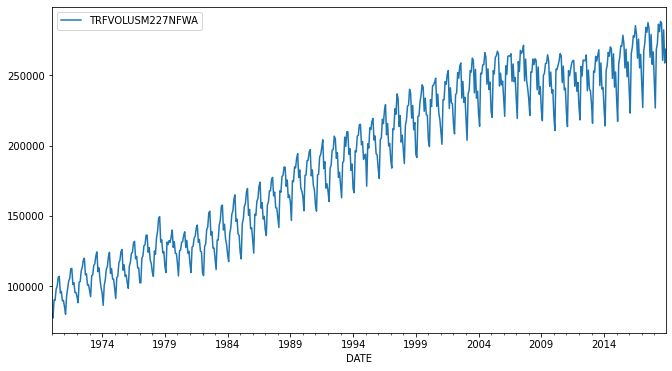

In [ ]:
df.plot(figsize=(11,6))

Task 2: Perform a Seasonal Decomposition on the Model and Plot 

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

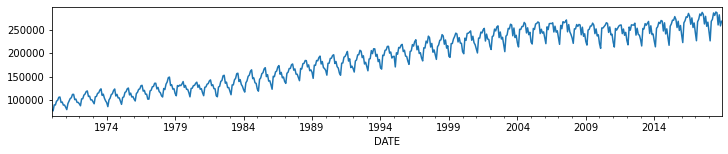

In [ ]:
results = seasonal_decompose(df['Value'])
results.observed.plot(figsize=(12,2))

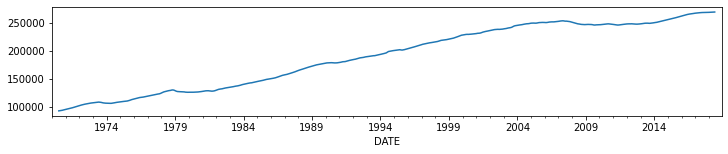

In [ ]:
results.trend.plot(figsize=(12,2))

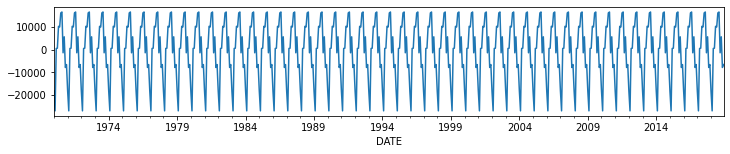

In [ ]:
results.seasonal.plot(figsize=(12,2))

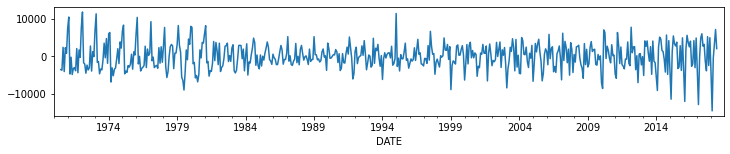

In [ ]:
results.resid.plot(figsize=(12,2))

Task 3: Train & Test Model Creation

In [ ]:
len(df)

588

In [ ]:
train_len = len(df)-12
train_len

576

Task 4: Scale Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

NameError: ignored

In [ ]:
# We have to Split the Dataset is in form of last 12 months of data

train = df.iloc[:train_len]
test = df.iloc[train_len:]

In [ ]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:

# We have to Use Time Series Model using Keras

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input =24 
n_features =1 
generator = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM # Long Short Term Memory 

In [ ]:
# Defining Model

In [ ]:
model = Sequential()
model.add(LSTM(150,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit_generator(generator,epochs=30)

Epoch 1/30
552/552 [==============================] - 7s 13ms/step - loss: 0.0100
Epoch 2/30
552/552 [==============================] - 7s 12ms/step - loss: 0.0060
Epoch 3/30
552/552 [==============================] - 7s 12ms/step - loss: 0.0063
Epoch 4/30
552/552 [==============================] - 7s 13ms/step - loss: 0.0054
Epoch 5/30
552/552 [==============================] - 7s 12ms/step - loss: 0.0037
Epoch 6/30
552/552 [==============================] - 7s 12ms/step - loss: 0.0029
Epoch 7/30
552/552 [==============================] - 7s 12ms/step - loss: 0.0022
Epoch 8/30
552/552 [==============================] - 7s 13ms/step - loss: 0.0018
Epoch 9/30
552/552 [==============================] - 7s 12ms/step - loss: 0.0016
Epoch 10/30
552/552 [==============================] - 7s 12ms/step - loss: 0.0013
Epoch 11/30
552/552 [==============================] - 7s 12ms/step - loss: 0.0012
Epoch 12/30
552/552 [==============================] - 7s 12ms/step - loss: 0.0012
Epoch 13/30
5

How to Plot History of loss

In [ ]:
model.history.history.keys()

dict_keys(['loss'])

In [ ]:
loss_per_epoch=model.history.history['loss']

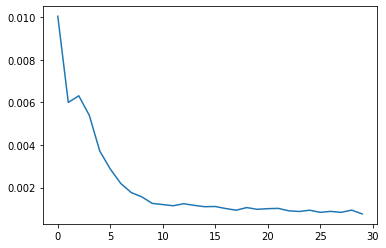

In [ ]:
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)